In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Read in file
df = pd.read_csv('MLF_GP2_EconCycle.csv')
df = df.drop('Date', axis = 1)
df.shape

# Check if there is any missing values 
print("Missing data in 'df': ")
print(df.isnull().sum(), "\n")


Missing data in 'df': 
T1Y Index      0
T2Y Index      0
T3Y Index      0
T5Y Index      0
T7Y Index      0
T10Y Index     0
CP1M           0
CP3M           0
CP6M           0
CP1M_T1Y       0
CP3M_T1Y       0
CP6M_T1Y       0
USPHCI         0
PCT 3MO FWD    0
PCT 6MO FWD    0
PCT 9MO FWD    0
dtype: int64 



In [2]:
df.head()

,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,USPHCI,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
0,10.41,9.86,9.50,9.20,9.14,9.10,9.75,9.95,10.01,0.936599,0.955812,0.961575,47.08,0.011470,0.018060,0.024406
1,10.24,9.72,9.29,9.13,9.11,9.10,9.74,9.90,9.96,0.951172,0.966797,0.972656,47.32,0.009298,0.014866,0.020612
2,10.25,9.79,9.38,9.20,9.15,9.12,9.72,9.85,9.87,0.948293,0.960976,0.962927,47.39,0.010340,0.015455,0.020154
3,10.12,9.78,9.43,9.25,9.21,9.18,9.86,9.95,9.98,0.974308,0.983202,0.986166,47.62,0.006720,0.013141,0.017409
4,10.12,9.78,9.42,9.24,9.23,9.25,9.77,9.76,9.71,0.965415,0.964427,0.959486,47.76,0.005653,0.011451,0.016353


In [4]:
X = df.drop(['PCT 3MO FWD','PCT 6MO FWD','PCT 9MO FWD','USPHCI'], axis = 1)

y_3mo = df['PCT 3MO FWD']
y_6mo = df['PCT 6MO FWD']
y_9mo = df['PCT 9MO FWD']

X.head()


,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y
0,10.41,9.86,9.50,9.20,9.14,9.10,9.75,9.95,10.01,0.936599,0.955812,0.961575
1,10.24,9.72,9.29,9.13,9.11,9.10,9.74,9.90,9.96,0.951172,0.966797,0.972656
2,10.25,9.79,9.38,9.20,9.15,9.12,9.72,9.85,9.87,0.948293,0.960976,0.962927
3,10.12,9.78,9.43,9.25,9.21,9.18,9.86,9.95,9.98,0.974308,0.983202,0.986166
4,10.12,9.78,9.42,9.24,9.23,9.25,9.77,9.76,9.71,0.965415,0.964427,0.959486


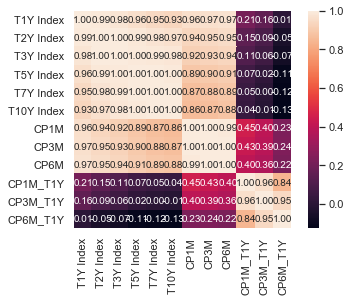

In [42]:
########################
# EDA
########################


#sns.pairplot(X, size=2)
#plt.tight_layout()
#plt.show()

# Respective linear correlations table
cm = np.corrcoef(X.values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 10},yticklabels=X.columns, xticklabels=X.columns)           
plt.show()

# TODO:1 heatmap for important X

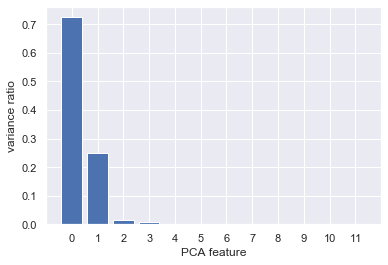

[7.24998047e-01 2.50493909e-01 1.44571262e-02 8.46657262e-03
 7.28316916e-04 5.73075439e-04 1.47635618e-04 8.76565137e-05
 2.50879613e-05 1.28052690e-05 7.54345374e-06 2.22445735e-06]


In [19]:

#PCA of all components

# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(X)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance ratio')
plt.xticks(features)
plt.show()
print(pca.explained_variance_ratio_)

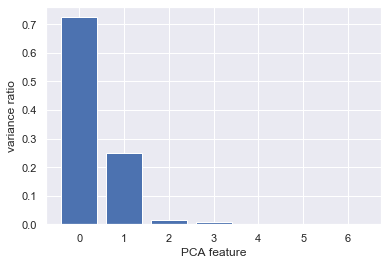

In [20]:
#PCA of n=5 components

# Create a PCA model with 7 components: pca
pca_n = PCA(n_components=7)

# Fit the PCA instance to the scaled samples
pca_n.fit(X)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca_n)

# Fit the pipeline to 'samples'
pipeline.fit(X)


# Plot the explained variances
features = range(pca_n.n_components_)
plt.bar(features, pca_n.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance ratio')
plt.xticks(features)
plt.show()

X_transform = pca_n.transform(X)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_transform, y_3mo, test_size = 0.3,random_state=42)
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_transform, y_6mo, test_size = 0.3,random_state=42)
X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(X_transform, y_9mo, test_size = 0.3,random_state=42)

In [44]:
##########################
# 1 DecisionTreeRegressor
##########################

# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV

def decisionTreeReg(XTrain,YTrain,XTest,YTest):
    dt=DecisionTreeRegressor()
    param = {'max_depth':[2,5,8,10]}
    dt_gs = GridSearchCV(dt,param,cv=10)
    # Fit dt to the training set
    dt_gs.fit(XTrain, YTrain)
    # Compute y_pred
    y_pred = dt_gs.predict(XTest)
    
    print("R^2 of train set:",dt_gs.score(XTrain,YTrain))
    print("R^2 of test set: ",dt_gs.score(XTest,YTest))
    # Compute mse_dt
    mse_dt = MSE(YTest, y_pred)
    # Compute rmse_dt
    rmse_dt = mse_dt**(1/2)
    # Print rmse_dt
    print("Test set RMSE of dt: {:.3f}".format(rmse_dt))

print('PCT 3MO FWD: ')
decisionTreeReg(X_train_3,y_train_3,X_test_3,y_test_3)
print('\nPCT 6MO FWD: ')
decisionTreeReg(X_train_6,y_train_6,X_test_6,y_test_6)
print('\nPCT 9MO FWD: ')
decisionTreeReg(X_train_9,y_train_9,X_test_9,y_test_9)

PCT 3MO FWD: 
R^2 of train set: 0.5008328748415829
R^2 of test set:  0.04652686516771998
Test set RMSE of dt: 0.004

PCT 6MO FWD: 
R^2 of train set: 0.8915571720080597
R^2 of test set:  0.02256506355134902
Test set RMSE of dt: 0.008

PCT 9MO FWD: 
R^2 of train set: 0.9074512046647146
R^2 of test set:  0.11310702868049238
Test set RMSE of dt: 0.011


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


PCT 3MO FWD: 
R^2 for train set: 0.199731553001664
R^2 for test set: 0.17278264404301902
Root Mean Squared Error: 0.003897866010759091


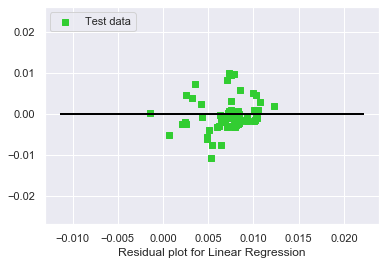


PCT 6MO FWD: 
R^2 for train set: 0.2494850762756539
R^2 for test set: 0.2588478471666372
Root Mean Squared Error: 0.007165144328047293


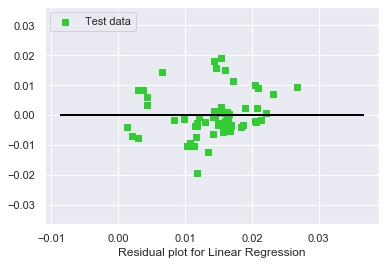


PCT 9MO FWD: 
R^2 for train set: 0.28722834249016455
R^2 for test set: 0.357261368067492
Root Mean Squared Error: 0.00943203841427205


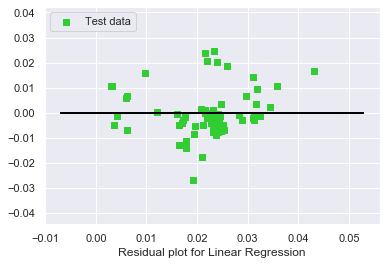

In [51]:
##########################
# 2 LinearRegression
##########################


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


def linearReg(XTrain,YTrain,XTest,YTest):
    # Create the regressor: reg_all
    reg_all = LinearRegression()

    # Fit the regressor to the training data
    reg_all.fit(XTrain, YTrain)
    y_pred = reg_all.predict(XTest)
    #TODO: IN/OUT SAMPLE

    # Coefficient and Intercept
    #print("Coefficient: \n",reg_all.coef_)
    #print("Intercept: ",reg_all.intercept_)
    # Compute and print R^2 and RMSE
    print("R^2 for train set: {}".format(reg_all.score(XTrain, YTrain)))
    print("R^2 for test set: {}".format(reg_all.score(XTest, YTest)))
    rmse = np.sqrt(mean_squared_error(YTest,y_pred))
    print("Root Mean Squared Error: {}".format(rmse))

    plt.scatter(y_pred, y_pred-YTest, c='limegreen', marker='s',label='Test data')
    plt.hlines(y=0,xmin=min(y_pred-0.01),xmax=max(y_pred+0.01),color='black',lw=2)
    plt.legend(loc='upper left')
    plt.xlabel('Residual plot for Linear Regression')
    plt.show()

print('PCT 3MO FWD: ')
linearReg(X_train_3, y_train_3, X_test_3, y_test_3)
print('\nPCT 6MO FWD: ')
linearReg(X_train_6, y_train_6, X_test_6, y_test_6)
print('\nPCT 9MO FWD: ')
linearReg(X_train_9, y_train_9, X_test_9, y_test_9)

PCT 3MO FWD: 


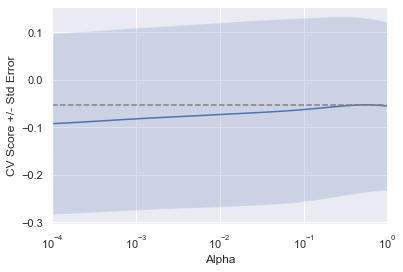

best alpha for ridge regression: 0.5689866029018293
Coefficients of ridge regression: [-7.07556647e-05 -4.06389276e-04  4.10733172e-04  3.64071087e-04
 -7.30094004e-05  3.19590585e-03 -9.90604120e-04]
The intercept of ridge regression:  0.009144487697679345
R^2 for train set: 0.1787822127822486
R^2 for test set: 0.14487613860589532
Root Mean Squared Error: 0.003963068689989141


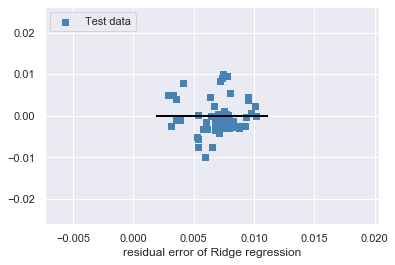


PCT 6MO FWD: 


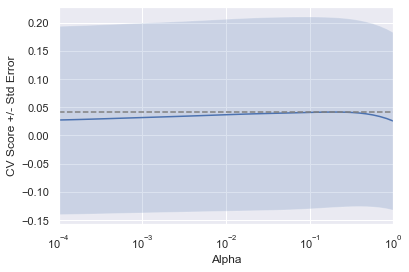

best alpha for ridge regression: 0.18420699693267145
Coefficients of ridge regression: [-0.00016611 -0.00084823  0.00127082  0.00095681 -0.00021632  0.00580176
 -0.00258442]
The intercept of ridge regression:  0.018141547796878772
R^2 for train set: 0.23952014321627713
R^2 for test set: 0.2621912825341999
Root Mean Squared Error: 0.007148964603429779


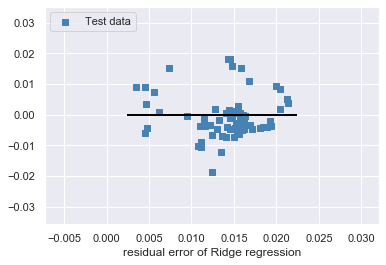


PCT 9MO FWD: 


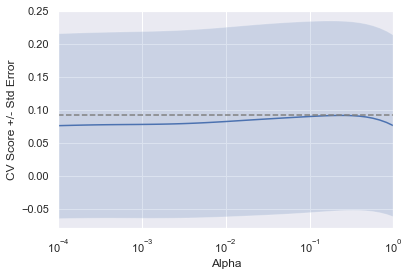

best alpha for ridge regression: 0.22229964825261933
Coefficients of ridge regression: [-0.00022943 -0.00091387  0.00196293  0.00146664 -0.0006179   0.0085239
 -0.00191744]
The intercept of ridge regression:  0.026115755576876384
R^2 for train set: 0.27451217599222655
R^2 for test set: 0.37610815340691794
Root Mean Squared Error: 0.009292723472413776


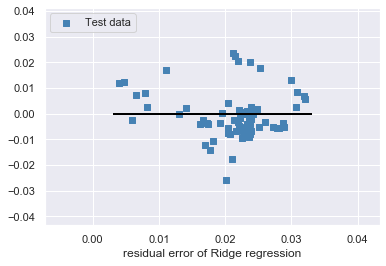

In [46]:
##########################
# 3 Ridge Regression
##########################


# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

def display_plot(cv_scores, cv_scores_std, alpha_space):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
    
def RidgeReg(X_train, y_train, X_test, y_test):
    # Setup the array of alphas and lists to store scores
    alpha_space = np.logspace(-4, 0, 50)
    ridge_scores = []
    ridge_scores_std = []

    # Create a ridge regressor: ridge
    ridge = Ridge(normalize=True)

    # Compute scores over range of alphas
    for alpha in alpha_space:

       # Specify the alpha value to use: ridge.alpha
       ridge.alpha = alpha

       # Perform 10-fold CV: ridge_cv_scores
       ridge_cv_scores = cross_val_score(ridge,X_train,y_train,cv=10)

       # Append the mean of ridge_cv_scores to ridge_scores
       ridge_scores.append(np.mean(ridge_cv_scores))

       # Append the std of ridge_cv_scores to ridge_scores_std
       ridge_scores_std.append(np.std(ridge_cv_scores))

    # Display the plot
    display_plot(ridge_scores, ridge_scores_std, alpha_space)
    index=ridge_scores.index(np.max(ridge_scores))
    best_alpha = alpha_space[index]
    print('best alpha for ridge regression:',alpha_space[index])

    ridge= Ridge(alpha=best_alpha, normalize = True)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)

    ridge.coef=ridge.fit(X_train,y_train).coef_
    print('Coefficients of ridge regression:',ridge.coef)
    print("The intercept of ridge regression: ",ridge.intercept_)
    # Compute and print R^2 and RMSE
    print("R^2 for train set: {}".format(ridge.score(X_train, y_train)))
    print("R^2 for test set: {}".format(ridge.score(X_test, y_test)))
   
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print("Root Mean Squared Error: {}".format(rmse))

    #Plot Residual Error
    plt.scatter(y_pred, y_pred-y_test, c='steelblue', marker='s',label='Test data')
    plt.hlines(y=0,xmin=min(y_pred)-0.001,xmax=max(y_pred)+0.001,color='black',lw=2)
    plt.legend(loc='upper left')
    plt.xlabel('residual error of Ridge regression')
    plt.show()
    
print('PCT 3MO FWD: ')
RidgeReg(X_train_3, y_train_3,X_test_3, y_test_3)
print('\nPCT 6MO FWD: ')
RidgeReg(X_train_6, y_train_6, X_test_6, y_test_6)
print('\nPCT 9MO FWD: ')
RidgeReg(X_train_9, y_train_9, X_test_9, y_test_9)

PCT 3MO FWD: 


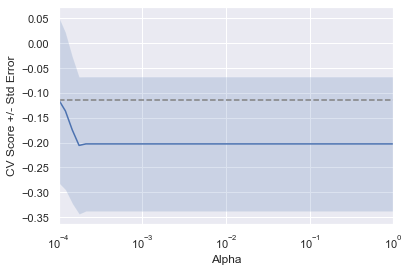

best alpha for alpha regression: 0.0001
Coefficients of lasso regression: [-8.54419956e-05 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00]
The intercept of lasso regression:  0.009070892889962687
R^2 for train set: 0.09483785670094125
R^2 for test set: 0.0756192342372396
Root Mean Squared Error: 0.004120429969958377


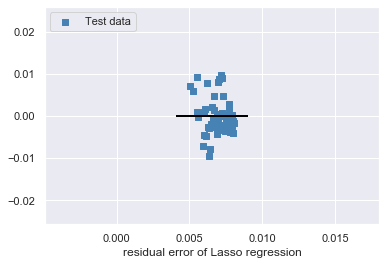


PCT 6MO FWD: 


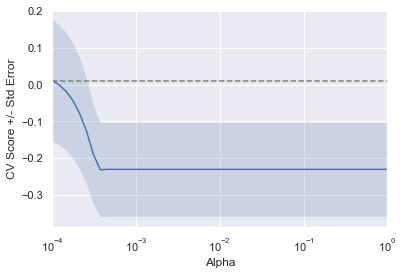

best alpha for alpha regression: 0.0001
Coefficients of lasso regression: [-0.00027287 -0.          0.00063916  0.00034076 -0.          0.
 -0.        ]
The intercept of lasso regression:  0.01962882487553547
R^2 for train set: 0.20873301337228325
R^2 for test set: 0.2521558500295138
Root Mean Squared Error: 0.007197419331033808


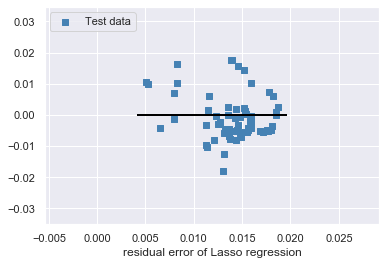


PCT 9MO FWD: 


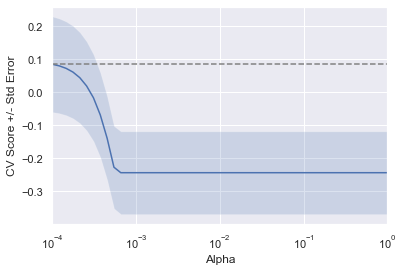

best alpha for alpha regression: 0.0001
Coefficients of lasso regression: [-0.00043668 -0.          0.00225776  0.00023893 -0.          0.
 -0.        ]
The intercept of lasso regression:  0.02807294267461212
R^2 for train set: 0.26061970850389504
R^2 for test set: 0.378853022509098
Root Mean Squared Error: 0.009272258846217496


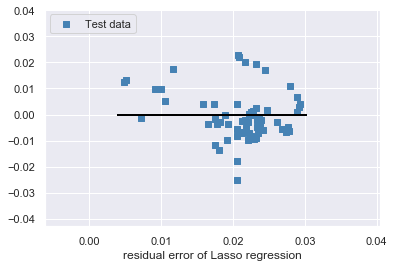

In [47]:
##########################
# 4 Lasso Regression
##########################


# Import Lasso
from sklearn.linear_model import Lasso

def LassoReg(X_train, y_train, X_test, y_test):
    # Setup the array of alphas and lists to store scores
    alpha_space = np.logspace(-4, 0, 50)
    lasso_scores = []
    lasso_scores_std = []

    # Create a ridge regressor: ridge
    lasso = Lasso(normalize=True)

    # Compute scores over range of alphas
    for alpha in alpha_space:

        # Specify the alpha value to use: ridge.alpha
        lasso.alpha = alpha

        # Perform 10-fold CV: ridge_cv_scores
        lasso_cv_scores = cross_val_score(lasso,X_train,y_train,cv=10)

        # Append the mean of ridge_cv_scores to ridge_scores
        lasso_scores.append(np.mean(lasso_cv_scores))

        # Append the std of ridge_cv_scores to ridge_scores_std
        lasso_scores_std.append(np.std(lasso_cv_scores))

    # Display the plot
    display_plot(lasso_scores, lasso_scores_std, alpha_space)

    #Find optimal alpha 
    index=lasso_scores.index(np.max(lasso_scores))
    best_alpha2 = alpha_space[index]
    print('best alpha for alpha regression:',alpha_space[index])


    # Instantiate a lasso regressor: lasso
    lasso = Lasso(alpha=best_alpha2, normalize = True,tol=0.1)

    # Fit the regressor to the data
    lasso.fit(X_train,y_train)

    y_pred = lasso.predict(X_test)

    lasso.coef=lasso.fit(X_train,y_train).coef_
    print('Coefficients of lasso regression:',lasso.coef)
    print("The intercept of lasso regression: ",lasso.intercept_)
    # Compute and print R^2 and RMSE
    print("R^2 for train set: {}".format(lasso.score(X_train, y_train)))
    print("R^2 for test set: {}".format(lasso.score(X_test, y_test)))
    
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print("Root Mean Squared Error: {}".format(rmse))

    #Plot Residual Error
    plt.scatter(y_pred, y_pred-y_test, c='steelblue', marker='s',label='Test data')
    plt.hlines(y=0,xmin=min(y_pred)-0.001,xmax=max(y_pred)+0.001,color='black',lw=2)
    plt.legend(loc='upper left')
    plt.xlabel('residual error of Lasso regression')
    plt.show()

print('PCT 3MO FWD: ')
LassoReg(X_train_3, y_train_3,X_test_3, y_test_3)
print('\nPCT 6MO FWD: ')
LassoReg(X_train_6, y_train_6, X_test_6, y_test_6)
print('\nPCT 9MO FWD: ')
LassoReg(X_train_9, y_train_9, X_test_9, y_test_9)

In [48]:
##########################
# 5 ElasticNet
##########################

from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

def eNet(X_train, y_train, X_test, y_test):
    en = ElasticNet()
    
    engs=GridSearchCV(estimator=en,param_grid={'alpha':np.logspace(-5,2,8),
                        'l1_ratio':[.2,.4,.6,.8]},cv=10)
    
    engs.fit(X_train, y_train)
    
    print(engs.best_params_)
    
    y_pred = engs.predict(X_test)

    # Compute MSE
    mse_test = MSE(y_pred,y_test)

    # Compute RMSE
    rmse_test = mse_test**(1/2)

    # Print RMSE
    print('Test set RMSE of Gradient Boosting: {:.3f}'.format(rmse_test))
    print('R^2 for train set:', engs.score(X_train,y_train))
    print('R^2 for test set:', engs.score(X_test,y_test))

    
print('PCT 3MO FWD: ')
eNet(X_train_3, y_train_3, X_test_3, y_test_3)
print('\nPCT 6MO FWD: ')
eNet(X_train_6, y_train_6, X_test_6, y_test_6)
print('\nPCT 9MO FWD: ')
eNet(X_train_9, y_train_9, X_test_9, y_test_9)

PCT 3MO FWD: 


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000780277874751886, tolerance: 3.0976518443012587e-07
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009019926739845406, tolerance: 3.623206586655309e-07
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.849765406841953e-05, tolerance: 3.5758236149103034e-07
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

{'alpha': 0.01, 'l1_ratio': 0.2}
Test set RMSE of Gradient Boosting: 0.004
R^2 for train set: 0.15432788900518235
R^2 for test set: 0.11807408938526574

PCT 6MO FWD: 


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003397967809419863, tolerance: 1.312044924966525e-06
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.092963708987463e-05, tolerance: 1.1954311397680802e-06
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.242805216438453e-05, tolerance: 1.3233594737574522e-06
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

{'alpha': 0.0001, 'l1_ratio': 0.4}
Test set RMSE of Gradient Boosting: 0.007
R^2 for train set: 0.2439995575255772
R^2 for test set: 0.27049501198252723

PCT 9MO FWD: 
{'alpha': 0.001, 'l1_ratio': 0.6}
Test set RMSE of Gradient Boosting: 0.009
R^2 for train set: 0.26826028109870825
R^2 for test set: 0.3880708601654631


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [49]:
#############################
# 6 GradientBoostingRegressor
#############################


# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

def gbReg(X_train, y_train, X_test, y_test):
    # Instantiate gb
    gb = GradientBoostingRegressor(max_depth=4, random_state=2)
    
    n_estimators = {'n_estimators': [50,100,200,300,400,500,600]}
    gb_gs = GridSearchCV(gb,n_estimators,cv=10)
    
    # Fit dt to the training set
    gb_gs.fit(X_train, y_train)
    
    
    # Compute y_pred
    y_pred = gb_gs.predict(X_test)

    # Compute MSE
    mse_test = MSE(y_pred,y_test)

    # Compute RMSE
    rmse_test = mse_test**(1/2)

    # Print RMSE
    print('Test set RMSE of Gradient Boosting: {:.3f}'.format(rmse_test))
    print('R^2 for test set:', gb_gs.score(X_test,y_test))
    print('R^2 for train set:', gb_gs.score(X_train,y_train))
    

    # Instantiate sgbr
    sgbr = GradientBoostingRegressor(max_depth=4, subsample=0.9, max_features=0.75, random_state=2)

    n_estimators = {'n_estimators': [50,100,200,300,400,500,600]}
    sgbr_gs = GridSearchCV(sgbr,n_estimators,cv=10)
    
    # Fit dt to the training set
    sgbr_gs.fit(X_train, y_train)
    
    print(sgbr_gs.best_params_)
    
    # Compute y_pred
    y_pred = sgbr_gs.predict(X_test)
    
    # Compute test set MSE
    mse_test = MSE(y_pred,y_test)

    # Compute test set RMSE
    rmse_test = mse_test **(1/2)

    # Print rmse_test
    print('Test set RMSE of Stochastic Gradient Boosting: {:.3f}'.format(rmse_test))
    print('R^2 for test set:', sgbr_gs.score(X_test,y_test))
    print('R^2 for train set:', sgbr_gs.score(X_train,y_train))
    
    
print('PCT 3MO FWD: ')
gbReg(X_train_3, y_train_3, X_test_3, y_test_3)
print('\nPCT 6MO FWD: ')
gbReg(X_train_6, y_train_6, X_test_6, y_test_6)
print('\nPCT 9MO FWD: ')
gbReg(X_train_9, y_train_9, X_test_9, y_test_9)

PCT 3MO FWD: 


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Test set RMSE of Gradient Boosting: 0.004
R^2 for test set: 0.030205748965405177
R^2 for train set: 0.9960698530323712


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 100}
Test set RMSE of Stochastic Gradient Boosting: 0.004
R^2 for test set: 0.12217753381109754
R^2 for train set: 0.9955341494847344

PCT 6MO FWD: 


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Test set RMSE of Gradient Boosting: 0.007
R^2 for test set: 0.319403417543476
R^2 for train set: 0.9853674272005924


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 100}
Test set RMSE of Stochastic Gradient Boosting: 0.007
R^2 for test set: 0.30413646637352465
R^2 for train set: 0.9977560884962382

PCT 9MO FWD: 


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Test set RMSE of Gradient Boosting: 0.009
R^2 for test set: 0.3785885751585347
R^2 for train set: 0.988382921749585
{'n_estimators': 50}
Test set RMSE of Stochastic Gradient Boosting: 0.009
R^2 for test set: 0.4215796993441601
R^2 for train set: 0.9874316448205411


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [50]:
###################
# 7 SVR
###################


from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

def svr(X_train,y_train,X_test,y_test):
    # Instantiate an RBF SVM
    svr =SVR()
    
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    
    param_grid = {'C': Cs, 'gamma': gammas}
    
    svr_gs = GridSearchCV(svr, param_grid, cv=10)
    
    # Fit dt to the training set
    svr_gs.fit(X_train, y_train)
    
    print(svr_gs.best_params_)
    
    # Compute y_pred
    y_pred = svr_gs.predict(X_test)
    
    svr_gs.fit(X_train,y_train)

    #Predict on both train and test data
    y_pred_train = svr_gs.predict(X_train)
    y_pred_test = svr_gs.predict(X_test)

    # Compute and print R^2 and RMSE
    print("R^2 for train set: {}".format(svr_gs.score(X_train, y_train)))
    print("R^2 for test set: {}".format(svr_gs.score(X_test, y_test)))
    rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))
    rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
    print("Root Mean Squared Error for train set: {}".format(rmse_train))
    print("Root Mean Squared Error for test set: {}".format(rmse_test))


print('PCT 3MO FWD: ')
svr(X_train_3, y_train_3,X_test_3, y_test_3)
print('\nPCT 6MO FWD: ')
svr(X_train_6, y_train_6, X_test_6, y_test_6)
print('\nPCT 9MO FWD: ')
svr(X_train_9, y_train_9, X_test_9, y_test_9)

PCT 3MO FWD: 


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.001, 'gamma': 0.001}


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


R^2 for train set: -0.0010118411448423181
R^2 for test set: -0.0313073651423168
Root Mean Squared Error for train set: 0.00503530683526565
Root Mean Squared Error for test set: 0.004352223071818062

PCT 6MO FWD: 


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.001, 'gamma': 0.001}


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


R^2 for train set: -0.0017825137424014592
R^2 for test set: -0.025979020443876788
Root Mean Squared Error for train set: 0.00943115307184228
Root Mean Squared Error for test set: 0.008430250813200724

PCT 9MO FWD: 


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.001, 'gamma': 0.001}
R^2 for train set: -0.017528831181942817
R^2 for test set: -0.061554887127758036
Root Mean Squared Error for train set: 0.013610309364861042
Root Mean Squared Error for test set: 0.012121589874095125


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


PCT 3MO FWD: 
For train set, the accuracy score is:
0.9076907705887349

For test set, the accuracy score is:
0.13276035410167775


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Best accuracy score for test set from the ParameterGrid:
0.2613933819912596

Best parameters:
{'n_estimators': 200, 'max_features': 'log2', 'max_depth': 9}


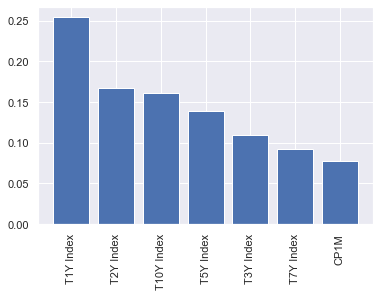


PCT 6MO FWD: 
For train set, the accuracy score is:
0.9329970845640394

For test set, the accuracy score is:
0.30262308134362037


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Best accuracy score for test set from the ParameterGrid:
0.3930170758102802

Best parameters:
{'n_estimators': 200, 'max_features': 'log2', 'max_depth': 9}


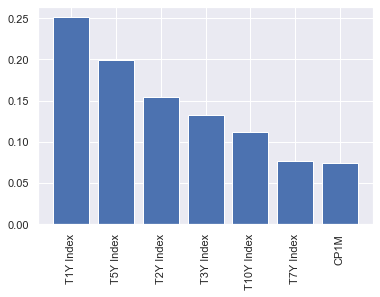


PCT 9MO FWD: 
For train set, the accuracy score is:
0.9521541022779015

For test set, the accuracy score is:
0.4053248612188247


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Best accuracy score for test set from the ParameterGrid:
0.5076387876032935

Best parameters:
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 9}


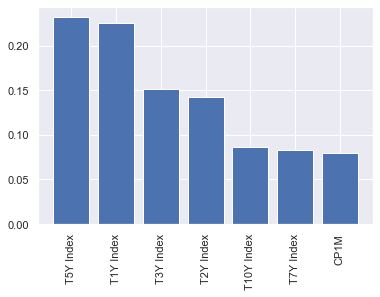

In [38]:
#############################
# 8 Random Forest Regression
#############################

from sklearn.ensemble import RandomForestRegressor 

def rfr(X_train,y_train,X_test,y_test):
    random_forest = RandomForestRegressor()
    random_forest.fit(X_train, y_train)
    print("For train set, the accuracy score is:")
    print(random_forest.score(X_train, y_train))
    print("\nFor test set, the accuracy score is:")
    print(random_forest.score(X_test, y_test))

    # Hyperparameters
    # ParameterGrid

    from sklearn.model_selection import ParameterGrid
    from pprint import pprint

    grid = {'n_estimators': [200], 'max_depth':[1, 9], 'max_features':["auto", "sqrt", "log2"]}
    #print(list(ParameterGrid(grid)))

    test_scores = []

    # loop through the parameter grid, set hyperparameters, save the scores
    for g in ParameterGrid(grid):
        random_forest.set_params(**g) # ** is "unpacking" the dictionary 
        random_forest.fit(X_train, y_train) 
        test_scores.append(random_forest.score(X_test, y_test))

    # find best hyperparameters from the test score and print
    best_idx = np.argmax(test_scores) 
    print("\nBest accuracy score for test set from the ParameterGrid:")
    print(test_scores[best_idx]) 
    print("\nBest parameters:")
    print(ParameterGrid(grid)[best_idx])

    # use best parameters
    best_random_forest = RandomForestRegressor(n_estimators=200, max_depth=9, max_features = 'log2', random_state=42)
    best_random_forest.fit(X_train, y_train)
    feature_importances = best_random_forest.feature_importances_
    #print(feature_importances)

    # feature importances from random forest model
    importances = best_random_forest.feature_importances_

    # index of greatest to least feature importances
    sorted_index = np.argsort(importances)[::-1]
    x = range(len(importances))

    # create tick labels
    feature_names = df.columns
    labels = np.array(feature_names)[sorted_index]
    plt.bar(x, importances[sorted_index], tick_label=labels)

    # rotate tick labels to vertical
    plt.xticks(rotation=90)
    plt.show()
    
print('PCT 3MO FWD: ')
rfr(X_train_3, y_train_3, X_test_3, y_test_3)
print('\nPCT 6MO FWD: ')
rfr(X_train_6, y_train_6, X_test_6, y_test_6)
print('\nPCT 9MO FWD: ')
rfr(X_train_9, y_train_9, X_test_9, y_test_9)

In [54]:
#############################
# Ensembling
#############################

from sklearn.ensemble import VotingRegressor


reg1 = GradientBoostingRegressor(max_depth=4, subsample=0.9, max_features=0.75, n_estimators=100, random_state=2)

reg2 = RandomForestRegressor(n_estimators=200, max_depth=9, max_features = 'log2', random_state=42)

reg3 = ElasticNet(alpha = 0.01, l1_ratio = 0.2)

reg4 = LinearRegression()

reg5 = Ridge(normalize = True, alpha = 0.18420699693267145)


# for y2,y3
eReg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2),('en', reg3)])

eReg.fit(X_train_9, y_train_9)
y_pred = eReg.predict(X_test_9)
print(eReg.score(X_test_9, y_test_9))

eReg.fit(X_train_6, y_train_6)
y_pred = eReg.predict(X_test_6)
print(eReg.score(X_test_6, y_test_6))

# for y1
eReg = VotingRegressor(estimators=[('rf', reg2),('lr', reg4),('rr', reg5)])

eReg.fit(X_train_3, y_train_3)
y_pred = eReg.predict(X_test_3)
print(eReg.score(X_test_3, y_test_3))


0.5104694659431817
0.3961149054482218
0.259196286341132


In [ ]:
print("\nMy name is Xin Wang")
print("My NetID is: xinw9")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

In [ ]:
print("\nMy name is Kainan Wang")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")